In [1]:
import cartopy.crs as crss
import cartopy.feature as cfeature
import matplotlib.pyplot as plt



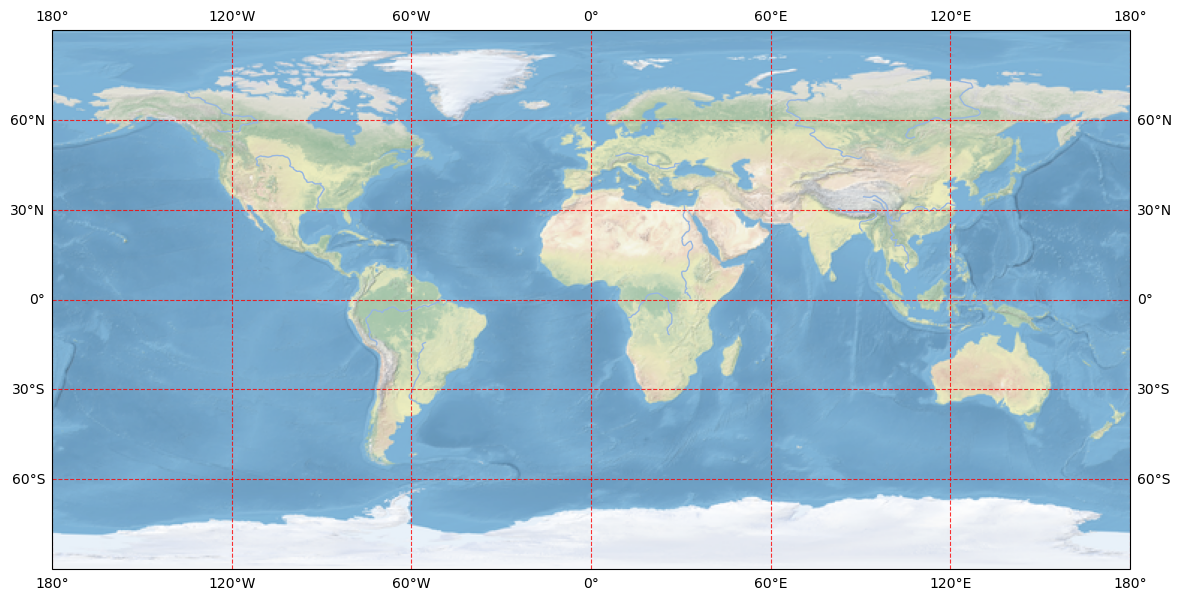

In [2]:
proj = crss.PlateCarree()
# fig = plt.figure()
# ax = fig.add_subplot(projection=proj)
fig, ax = plt.subplots(figsize=(15,7),  subplot_kw={'projection':proj})
ax.set_extent([-180,180,-90,90])
# ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAND)
ax.stock_img()
ax.gridlines(draw_labels=True, linestyle='--', color='red', alpha=0.8)


Text(0.5, 1.0, 'Orthographic')

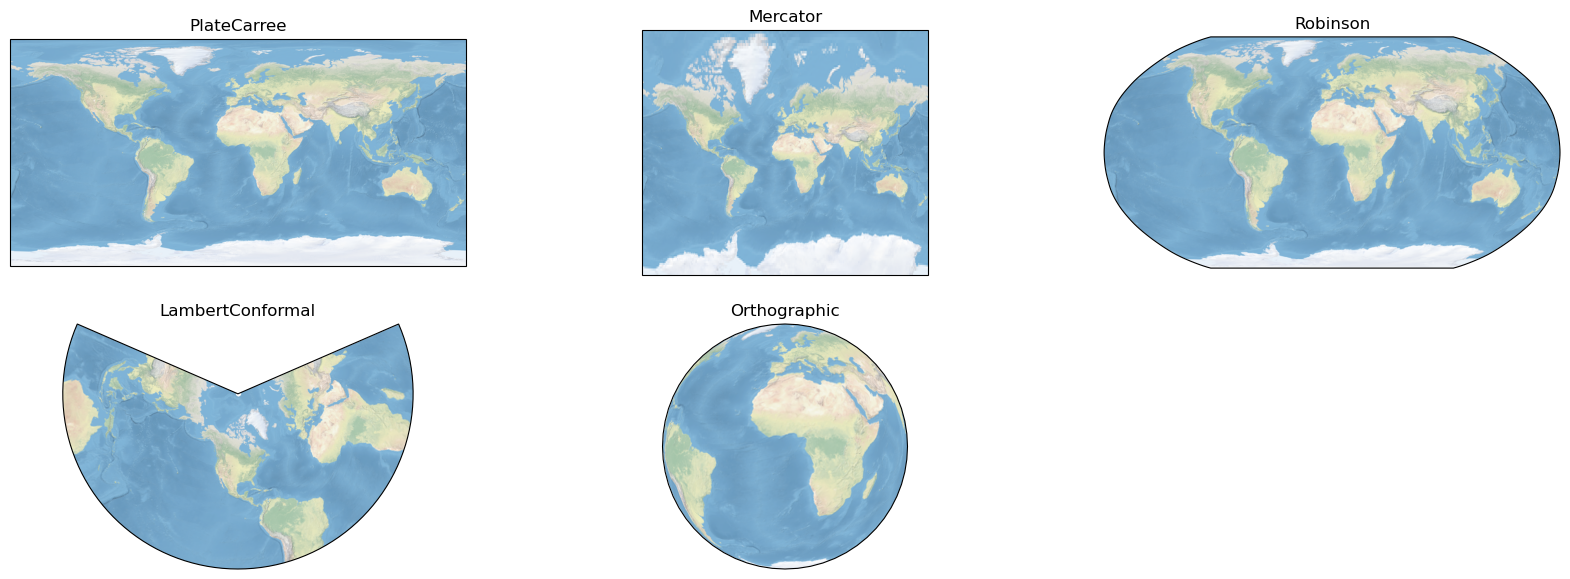

In [3]:
proj1 = crss.PlateCarree()
proj2 = crss.Mercator()
proj3 = crss.Robinson() 
proj4 = crss.LambertConformal() 
proj5 = crss.Orthographic()


fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(2,3,1, projection=proj1)
ax1.stock_img()
ax1.set_title('PlateCarree')

ax2 = fig.add_subplot(2,3,2, projection=proj2)
ax2.stock_img()
ax2.set_title('Mercator')

ax3 = fig.add_subplot(2,3,3, projection=proj3)
ax3.stock_img()
ax3.set_title('Robinson')

ax4 = fig.add_subplot(2,3,4, projection=proj4)
ax4.stock_img()
ax4.set_title('LambertConformal')


ax5 = fig.add_subplot(2,3,5, projection=proj5)
ax5.stock_img()
ax5.set_title('Orthographic')

# ax[0]



In [9]:
## 同一个画板上显示不同投影坐标系的空间数据
import geopandas as gpd
import rasterio as rio

path_vec = 'data/data-base/ChinaAdminDivisonSHP/2. Province/province.shp'
path_vec_utm48 = 'data/data-section-4/province_wgs84_utm48.gpkg'
path_raster = 'data/data-section-4/rsimg_wgs84_utm45_gdal.tif'
vec_china = gpd.read_file(path_vec)
vec_china_utm48 = gpd.read_file(path_vec_utm48)
with rio.open(path_raster) as rsimg:
    rsimg_arr =  rsimg.read(1)
    rsimg_crs = rsimg.crs
    left, bottom, right, top = rsimg.bounds



In [28]:
(left, right, bottom, top)


(555842.4915597304, 622789.0245282245, 3619285.4976691813, 3684276.5943805836)

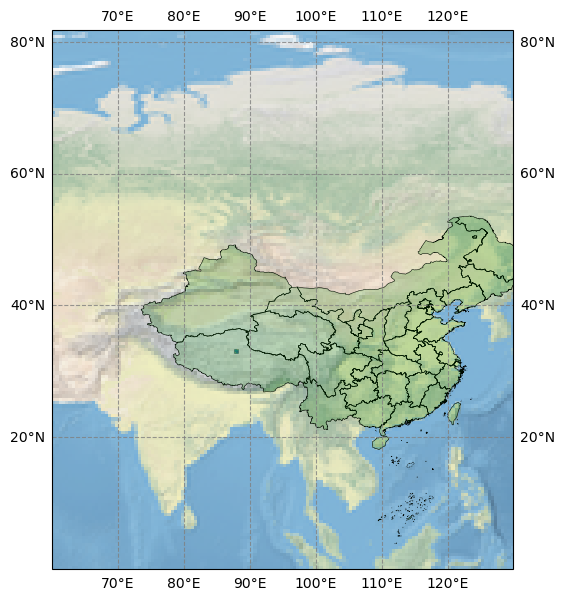

In [ ]:
proj = crss.PlateCarree()
proj_utm45=crss.UTM(zone=45, southern_hemisphere=False)
proj_utm48=crss.UTM(zone=48, southern_hemisphere=False)

fig, ax = plt.subplots(figsize=(15,7),  subplot_kw={'projection':proj})
ax.stock_img()
ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.8)
ax.set_extent([60, 130, 0, 80])
vec_china.plot(ax=ax, facecolor='none', linewidth=0.4)
vec_china_utm48.plot(ax=ax, transform=proj_utm48,facecolor='green',linewidth=0.2, alpha=0.2)
ax.imshow(rsimg_arr, vmax=3000, transform=proj_utm45, vmin=0, extent=(left, right, bottom, top))
